In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
cd /content/drive/MyDrive/KLTN/retro/source

/content/drive/MyDrive/KLTN/retro/source


In [89]:
!pip install sentencepiece tokenizers==0.11.1 sacremoses huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 14.2 MB/s 
     |████████████████████████████████| 6.8 MB 30.8 MB/s 
     |████████████████████████████████| 880 kB 66.3 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████████| 596 kB 65.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=04b258a47cee60452ddc4f103e4f3ee0c9a744647542035307a1aea4f383a7a1
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# New Sketchy Module

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128/cls_score.json,/content/drive/MyDrive/KLTN/baseline/mbert/null_odds_.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/mbert/nbest_predictions_.json"\
  --thresh 1.862 \
  --predict_file "/content/drive/MyDrive/KLTN/data/test-new.json"

[3, 1]
Bad: 0
{
    "exact": 42.032085561497325,
    "f1": 55.03101077353048,
    "total": 2805,
    "HasAns_exact": 31.50147203140334,
    "HasAns_f1": 49.39253445522717,
    "HasAns_total": 2038,
    "NoAns_exact": 70.01303780964798,
    "NoAns_f1": 70.01303780964798,
    "NoAns_total": 767,
    "best_exact": 42.06773618538325,
    "best_exact_thresh": 1.8627694696187973,
    "best_f1": 55.06666139741649,
    "best_f1_thresh": 1.8627694696187973
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score.json,/content/drive/MyDrive/KLTN/retro/results/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/results/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/nbest_predictions_.json"\
  --thresh -0.15 \
  --predict_file "/content/drive/MyDrive/KLTN/data/test-new.json"

[2.5, 1]
Bad: 0
{
    "exact": 45.88235294117647,
    "f1": 59.343384864075894,
    "total": 2805,
    "HasAns_exact": 34.39646712463199,
    "HasAns_f1": 52.92354982518777,
    "HasAns_total": 2038,
    "NoAns_exact": 76.40156453715775,
    "NoAns_f1": 76.40156453715775,
    "NoAns_total": 767,
    "best_exact": 46.16755793226381,
    "best_exact_thresh": -0.7361802480050496,
    "best_f1": 59.49787090091488,
    "best_f1_thresh": -0.36301026174000334
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score.json,/content/drive/MyDrive/KLTN/retro/results/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/null_odds_.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/results/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/nbest_predictions_.json"\
  --thresh 0 \
  --predict_file "/content/drive/MyDrive/KLTN/data/test-new.json"

[2.5, 1]
Bad: 0
{
    "exact": 46.381461675579324,
    "f1": 60.94084946315958,
    "total": 2805,
    "HasAns_exact": 35.2306182531894,
    "HasAns_f1": 55.269422347479036,
    "HasAns_total": 2038,
    "NoAns_exact": 76.01043024771839,
    "NoAns_f1": 76.01043024771839,
    "NoAns_total": 767,
    "best_exact": 46.524064171122994,
    "best_exact_thresh": -0.8923388889857701,
    "best_f1": 61.012150710931486,
    "best_f1_thresh": 1.9301559243883406
}


In [ ]:
#sketchy module
!python run_cls.py \
    --model_type xlm_roberta \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/test-new.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: xlm_roberta
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.bi

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type phobert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --max_seq_len 256 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/test-new.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 256
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: phobert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type mbert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 10 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128 \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/test-new.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 10
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: mbert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight'

In [ ]:
!python run_av.py \
    --model_type xlm_roberta \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --null_score_diff_threshold -0.04 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

Streaming output truncated to the last 5000 lines.
08/01/2022 16:55:46 - INFO - evaluate_squad -   Unable to find text: 'viên đến hà nội' in 'Viên đến Hà Nội'
08/01/2022 16:55:46 - INFO - evaluate_squad -   Unable to find text: 'chính phủ cử đại diện' in 'chính phủ cử đại diện'
08/01/2022 16:55:46 - INFO - evaluate_squad -   Unable to find text: 'đại diện đến thuyết phục mọi người cùng chống pháp' in 'đại diện đến thuyết phục mọi người cùng chống Pháp'
08/01/2022 16:55:46 - INFO - evaluate_squad -   Unable to find text: 'yêu cầu chính phủ cử đại diện đến thuyết phục mọi người cùng chống pháp' in 'yêu cầu chính phủ cử đại diện đến thuyết phục mọi người cùng chống Pháp'
08/01/2022 16:55:46 - INFO - evaluate_squad -   Unable to find text: 'binh sĩ đào ngũ từ các đơn vị lính thuộc địa cũng đổ về hà giang giúp viên có được một đội quân khoảng 400 người . việt quốc và việt minh tại hà giang mâu thuẫn nhau khiến viên đến hà nội yêu cầu chính phủ cử đại diện đến thuyết phục mọi người cùng chốn

In [ ]:
!python run_av.py \
    --model_type phobert \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 256 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

Streaming output truncated to the last 5000 lines.
08/01/2022 10:48:31 - INFO - evaluate_squad -   Unable to find text: 'một ngôi nhà nhỏ sát đê bưởi , cách dốc cống vị khoảng 300 mét để tránh bị ám sát' in 'một ngôi nhà nhỏ sát đê Bưởi , cách dốc Cống Vị khoảng 300 mét để tránh bị ám sát'
08/01/2022 10:48:31 - INFO - evaluate_squad -   Unable to find text: 'mà chuyển về ở tại một ngôi nhà nhỏ sát đê bưởi , cách dốc cống vị khoảng 300 mét để tránh bị ám sát' in 'mà chuyển về ở tại một ngôi nhà nhỏ sát đê Bưởi , cách dốc Cống Vị khoảng 300 mét để tránh bị ám sát'
08/01/2022 10:48:31 - INFO - evaluate_squad -   Unable to find text: 'chuyển về ở tại một ngôi nhà nhỏ sát đê bưởi , cách dốc cống vị khoảng 300 mét để tránh bị ám' in 'chuyển về ở tại một ngôi nhà nhỏ sát đê Bưởi , cách dốc Cống Vị khoảng 300 mét để tránh bị ám'
08/01/2022 10:48:31 - INFO - evaluate_squad -   Unable to find text: 'ngôi nhà nhỏ sát đê bưởi , cách dốc cống vị khoảng 300 mét để tránh bị ám sát' in 'ngôi nhà nhỏ s

In [ ]:
!python run_av.py \
    --model_type mbert \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/test-new.json \
    --learning_rate 2e-5 \
    --num_train_epochs 15 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=64 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_mbert_lr2e-05_len512_bs8_ep15_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 5000 \
    --n_best_size 20 \
    --logging_steps 500 \
    --max_answer_length 500


	adam_epsilon: 1e-08
	checkpoint: None
	do_eval: True
	do_lower_case: True
	do_train: False
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 500
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 64
	max_seq_length: 512
	max_steps: -1
	model_type: mbert
	n_best_size: 20
	null_score_diff_threshold: 0.0
	num_train_epochs: 15
	output_dir: /content/drive/MyDrive/KLTN/retro/result/av_dev_mbert_lr2e-05_len512_bs8_ep15_wm128
	overwrite_cache: False
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/KLTN/data/test-new.json
	save_steps: 5000
	seed: 21
	train_file: /content/drive/MyDrive/KLTN/data/kltn/train.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at bert-base-multilingual-uncased were

# Sketchy module

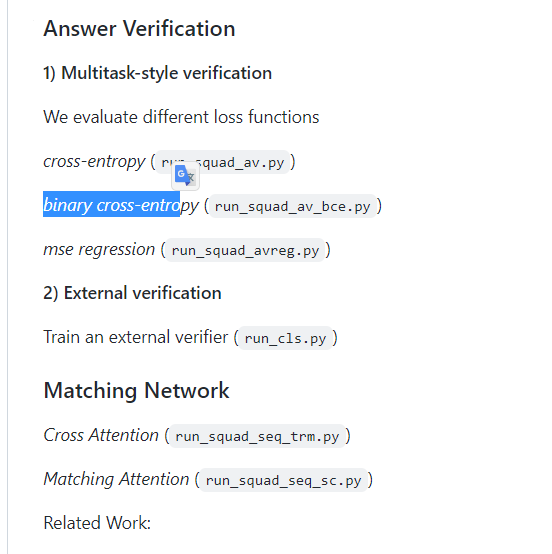

### XLMR

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type xlm_roberta \
    --do_eval \
    --do_train \
    --do_lower_case \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir result/cls_squad2_phobert_lr2e-5_len256_bs32_ep2_wm814 \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: True
	epochs: 15
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: xlm_roberta
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: ../result/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json
	warmup_steps: 128
	weight_decay: 0.001
Downloading: 100% 615/615 [00:00<00:00, 948kB/s]
Downloading: 100% 4.83M/4.83M [00:00<00:00, 19.9MB/s]
Downloading: 100% 8.68M/8.68M [00:00<00:00, 29.4MB/s]


In [ ]:
#sketchy module
!python run_cls.py \
    --model_type xlm_roberta \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/dev.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: xlm_roberta
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'rob

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type xlm_roberta \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/test.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/test.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: xlm_roberta
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head

### PhoBERT

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type phobert \
    --do_eval \
    --do_train \
    --do_lower_case \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --max_seq_len 256 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir result/cls_squad2_phobert_lr2e-5_len256_bs32_ep2_wm814 \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type phobert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --max_seq_len 256 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/dev.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 256
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: phobert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decode

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type phobert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/test.json \
    --max_seq_len 256 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 15 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128 \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/test.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 15
	eval_all_checkpoints: False
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 256
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: phobert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense

### mBERT

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type mbert \
    --do_eval \
    --do_train \
    --do_lower_case \
    --train_file /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json \
    --dev_file /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 10 \
    --output_dir result/cls_squad2_mbert_lr5e-6_len256_bs32_ep2_wm814_uncased \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: True
	epochs: 10
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: mbert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: ../result/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json
	warmup_steps: 128
	weight_decay: 0.001
Downloading: 100% 625/625 [00:00<00:00, 646kB/s]
Downloading: 100% 28.0/28.0 [00:00<00:00, 45.3kB/s]
Downloading: 100% 851k/851k [00:00<00:00, 11.0MB/s]
Downloading: 100

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type mbert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 10 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128 \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/dev.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 10
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: mbert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions

In [ ]:
#sketchy module
!python run_cls.py \
    --model_type mbert \
    --do_eval \
    --do_lower_case \
    --dev_file /content/drive/MyDrive/KLTN/data/kltn/test.json \
    --max_seq_len 512 \
    --per_gpu_train_batch_size=8   \
    --per_gpu_eval_batch_size=8  \
    --gradient_accumulation_steps 4 \
    --warmup_steps=128 \
    --weight_decay 1e-3 \
    --lr 5e-6 \
    --epochs 10 \
    --output_dir /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128 \
    --eval_all_checkpoints \
    --save_steps 0 \
    --logging_steps 500

	adam_epsilon: 1e-08
	dev_file: /content/drive/MyDrive/KLTN/data/kltn/test.json
	do_eval: True
	do_lower_case: True
	do_predict: False
	do_train: False
	epochs: 10
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	local_rank: -1
	logging_steps: 500
	lr: 5e-06
	max_grad_norm: 1.0
	max_seq_len: 512
	max_steps: 0
	mix_count: None
	mix_type: None
	model_type: mbert
	n_gpu: 1
	num_labels: 2
	optim: AdamW
	output_dir: /content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128
	overwrite_output_dir: False
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: None
	save_steps: 0
	seed: 21
	train_file: None
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relations

# Advanced Reader

### XLMR

In [ ]:
!python run_av.py \
    --model_type xlm_roberta \
    --do_train \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json \
    --predict_file  /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json \
    --checkpoint /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep10_wm128 \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep10_wm128_cont \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

	adam_epsilon: 1e-08
	checkpoint: /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep10_wm128
	do_eval: True
	do_lower_case: True
	do_train: True
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 0
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 128
	max_seq_length: 512
	max_steps: -1
	model_type: xlm_roberta
	n_best_size: 20
	null_score_diff_threshold: 0.0
	num_train_epochs: 5
	output_dir: ../result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128
	overwrite_cache: True
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json
	verbose_logging: True


In [ ]:
!python run_av.py \
    --model_type xlm_roberta \
    --do_eval \
    --version_2_with_negative \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

In [ ]:
!python run_av.py \
    --model_type xlm_roberta \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/test.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --null_score_diff_threshold -0.04 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

	adam_epsilon: 1e-08
	checkpoint: None
	do_eval: True
	do_lower_case: True
	do_train: False
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 0
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 128
	max_seq_length: 512
	max_steps: -1
	model_type: xlm_roberta
	n_best_size: 20
	null_score_diff_threshold: -0.04
	num_train_epochs: 5
	output_dir: /content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128
	overwrite_cache: True
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/KLTN/data/kltn/test.json
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/KLTN/data/kltn/train.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at xlm-roberta-base were not

### PhoBERT

In [ ]:
!python run_av.py \
    --model_type phobert \
    --do_train \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --learning_rate 2e-5 \
    --num_train_epochs 10 \
    --max_seq_length 256 \
    --doc_stride 64 \
    --max_query_length=64 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir result/av_phobert_lr2e-5_len256_bs16_ep2_wm814 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 2000 \
    --n_best_size 20 \
    --logging_steps 500 \
    --max_answer_length 500


	adam_epsilon: 1e-08
	do_eval: True
	do_lower_case: True
	do_train: True
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 500
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 64
	max_seq_length: 256
	max_steps: -1
	model_type: xlm_roberta
	n_best_size: 20
	null_score_diff_threshold: 0.0
	num_train_epochs: 10
	output_dir: ../result/av_dev_5_xlm_roberta_lr2e-05_len256_bs8_ep10_wm128
	overwrite_cache: False
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json
	save_steps: 2000
	seed: 21
	train_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model c

In [ ]:
!python run_av.py \
    --model_type phobert \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 256 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

	adam_epsilon: 1e-08
	checkpoint: None
	do_eval: True
	do_lower_case: True
	do_train: False
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 0
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 128
	max_seq_length: 256
	max_steps: -1
	model_type: phobert
	n_best_size: 20
	null_score_diff_threshold: 0.0
	num_train_epochs: 5
	output_dir: /content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128
	overwrite_cache: True
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/KLTN/data/kltn/dev.json
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/KLTN/data/kltn/train.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Special tokens have been added in the vocabulary, make sure the associated 

In [ ]:
!python run_av.py \
    --model_type phobert \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/test.json \
    --learning_rate 2e-5 \
    --num_train_epochs 5 \
    --max_seq_length 256 \
    --doc_stride 64 \
    --max_query_length=128 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --null_score_diff_threshold -2.537 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_steps 0 \
    --overwrite_cache \
    --max_answer_length=500

	adam_epsilon: 1e-08
	checkpoint: None
	do_eval: True
	do_lower_case: True
	do_train: False
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 4
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 0
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 128
	max_seq_length: 256
	max_steps: -1
	model_type: phobert
	n_best_size: 20
	null_score_diff_threshold: -2.537
	num_train_epochs: 5
	output_dir: /content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128
	overwrite_cache: True
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 8
	per_gpu_train_batch_size: 8
	predict_file: /content/drive/MyDrive/KLTN/data/kltn/test.json
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/KLTN/data/kltn/train.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Special tokens have been added in the vocabulary, make sure the associa

### mBERT

In [ ]:
!python run_av.py \
    --model_type mbert \
    --do_train \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --learning_rate 2e-5 \
    --num_train_epochs 15 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=64 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_5_mbert_lr2e-05_len512_bs8_ep10_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 5000 \
    --n_best_size 20 \
    --logging_steps 500 \
    --max_answer_length 500


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python run_av.py \
    --model_type mbert \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/KLTN/data/kltn/train.json \
    --predict_file /content/drive/MyDrive/KLTN/data/kltn/dev.json \
    --learning_rate 2e-5 \
    --num_train_epochs 15 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=64 \
    --per_gpu_train_batch_size=8 \
    --per_gpu_eval_batch_size=8 \
    --gradient_accumulation_steps 4 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir /content/drive/MyDrive/KLTN/retro/result/av_dev_mbert_lr2e-05_len512_bs8_ep15_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 5000 \
    --n_best_size 20 \
    --logging_steps 500 \
    --max_answer_length 500


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python run_av.py \
    --model_type mbert \
    --do_train \
    --do_eval \
    --version_2_with_negative \
    --train_file /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json \
    --predict_file  /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json \
    --learning_rate 2e-5 \
    --num_train_epochs 10 \
    --max_seq_length 512 \
    --doc_stride 64 \
    --max_query_length=32 \
    --per_gpu_train_batch_size=2 \
    --per_gpu_eval_batch_size=2 \
    --gradient_accumulation_steps 8 \
    --weight_decay 1e-3 \
    --warmup_steps=128 \
    --output_dir  /content/drive/MyDrive/KLTN/source/result/av_dev_1_xlm_roberta_lr2e-05_len512_bs4_ep4_wm128 \
    --do_lower_case \
    --verbose_logging \
    --eval_all_checkpoints \
    --save_steps 0 \
    --n_best_size 20 \
    --logging_step 500 \
    --overwrite_cache \
    --max_answer_length=500

	adam_epsilon: 1e-08
	do_eval: True
	do_lower_case: True
	do_train: True
	doc_stride: 64
	eval_all_checkpoints: True
	evaluate_during_training: False
	gradient_accumulation_steps: 8
	learning_rate: 2e-05
	local_rank: -1
	logging_steps: 500
	max_answer_length: 500
	max_grad_norm: 1.0
	max_query_length: 32
	max_seq_length: 512
	max_steps: -1
	model_type: mbert
	n_best_size: 20
	null_score_diff_threshold: 0.0
	num_train_epochs: 10
	output_dir: ../result/av_dev_5_mbert_lr2e-05_len512_bs2_ep10_wm128
	overwrite_cache: True
	overwrite_output_dir: False
	padding_side: right
	per_gpu_eval_batch_size: 2
	per_gpu_train_batch_size: 2
	predict_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json
	save_steps: 0
	seed: 21
	train_file: /content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/train_5.json
	verbose_logging: True
	version_2_with_negative: True
	warmup_steps: 128
	weight_decay: 0.001
Some weights of the model checkpoint at ber

# Verifired

### PhoBERT

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score_test.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/nbest_predictions_test.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[2, 1]
Bad: 0
{
    "exact": 47.34416686878487,
    "f1": 61.04320425879524,
    "total": 4123,
    "HasAns_exact": 38.27785817655572,
    "HasAns_f1": 58.712420824534306,
    "HasAns_total": 2764,
    "NoAns_exact": 65.78366445916114,
    "NoAns_f1": 65.78366445916114,
    "NoAns_total": 1359,
    "best_exact": 48.89643463497453,
    "best_exact_thresh": -4.093363245328267,
    "best_f1": 61.42146114241532,
    "best_f1_thresh": -2.627161900202433
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

[3, 1]
Bad: 0
{
    "exact": 47.96774193548387,
    "f1": 61.52177277282978,
    "total": 3100,
    "HasAns_exact": 40.150093808630395,
    "HasAns_f1": 59.858112380756126,
    "HasAns_total": 2132,
    "NoAns_exact": 65.18595041322314,
    "NoAns_f1": 65.18595041322314,
    "NoAns_total": 968,
    "best_exact": 48.83870967741935,
    "best_exact_thresh": -2.4435650631785393,
    "best_f1": 61.7069842954064,
    "best_f1_thresh": -2.0544917583465576
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score_test.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_phobert_lr2e-05_len256_bs8_ep10_wm128/nbest_predictions_test.json"\
  --thresh -2.055 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[3, 1]
Bad: 0
{
    "exact": 48.36284259034684,
    "f1": 61.261519423900964,
    "total": 4123,
    "HasAns_exact": 36.57742402315485,
    "HasAns_f1": 55.81810585555127,
    "HasAns_total": 2764,
    "NoAns_exact": 72.33259749816041,
    "NoAns_f1": 72.33259749816041,
    "NoAns_total": 1359,
    "best_exact": 49.06621392190153,
    "best_exact_thresh": -3.262702025473118,
    "best_f1": 61.35716758465062,
    "best_f1_thresh": -2.1742676347494125
}


### XLMR

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

[3, 1]
Bad: 0
{
    "exact": 47.12903225806452,
    "f1": 59.695980003917505,
    "total": 3100,
    "HasAns_exact": 38.789868667917446,
    "HasAns_f1": 57.062635090123926,
    "HasAns_total": 2132,
    "NoAns_exact": 65.49586776859505,
    "NoAns_f1": 65.49586776859505,
    "NoAns_total": 968,
    "best_exact": 48.096774193548384,
    "best_exact_thresh": -3.6667090505361557,
    "best_f1": 59.88952839101434,
    "best_f1_thresh": -1.0526664778590202
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score_test.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/nbest_predictions_test.json"\
  --thresh  -1.052 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[3, 1]
Bad: 0
{
    "exact": 48.071792384186274,
    "f1": 60.520817660610604,
    "total": 4123,
    "HasAns_exact": 36.93921852387844,
    "HasAns_f1": 55.50916469417417,
    "HasAns_total": 2764,
    "NoAns_exact": 70.71376011773363,
    "NoAns_f1": 70.71376011773363,
    "NoAns_total": 1359,
    "best_exact": 48.87218045112782,
    "best_exact_thresh": -3.261316552758217,
    "best_f1": 60.54507184445705,
    "best_f1_thresh": -1.129436418414116
}


### mBERT

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/baseline/result/mbert/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/result/mbert/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

[2, 1]
Bad: 0
{
    "exact": 44.54838709677419,
    "f1": 55.21645923198931,
    "total": 3100,
    "HasAns_exact": 34.09943714821764,
    "HasAns_f1": 49.611174305425315,
    "HasAns_total": 2132,
    "NoAns_exact": 67.56198347107438,
    "NoAns_f1": 67.56198347107438,
    "NoAns_total": 968,
    "best_exact": 44.58064516129032,
    "best_exact_thresh": -0.9895853797594706,
    "best_f1": 55.2379646083335,
    "best_f1_thresh": -0.9895853797594706
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_mbert_lr5e-06_len512_bs8_ep10_wm128/cls_score_test.json,/content/drive/MyDrive/KLTN/baseline/result/mbert/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/result/mbert/nbest_predictions_test.json" \
  --thresh -0.989 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[2, 1]
Bad: 0
{
    "exact": 44.118360417171964,
    "f1": 55.85805319522521,
    "total": 4123,
    "HasAns_exact": 32.850940665701884,
    "HasAns_f1": 50.36279063817431,
    "HasAns_total": 2764,
    "NoAns_exact": 67.0345842531273,
    "NoAns_f1": 67.0345842531273,
    "NoAns_total": 1359,
    "best_exact": 44.3609022556391,
    "best_exact_thresh": -1.377823829650879,
    "best_f1": 56.00357829830556,
    "best_f1_thresh": 1.8500774502754211
}


# Keep the highest probability among duplicate answer 

In [ ]:
prediction_file = "/content/drive/MyDrive/KLTN/baseline/xlmroberta_10ep/predictions_.json"
nbest_file = "/content/drive/MyDrive/KLTN/baseline/xlmroberta_10ep/nbest_predictions_.json"
gold_answer_file = "/content/drive/MyDrive/KLTN/data/ViQuADv2/full_data/5_fold_syllable/dev_5.json"

In [ ]:
import collections
import json

all_nbest = collections.OrderedDict()
with open(nbest_file, "r") as reader:
    input_data = json.load(reader, strict=False)
    for (key, entries) in input_data.items():
        if key not in all_nbest:
            all_nbest[key] = collections.defaultdict(float)
        for entry in entries:
            all_nbest[key][entry["text"]] = entry["probability"]

In [ ]:
def group_ans_in_context(test_file):
  public_test = json.load(open(test_file))['data']
  i = 0
  data_id = {}
  for dt in public_test:
    for para in dt['paragraphs']:
      a = []
      for qa in para['qas']:
        a.append(qa['id'])
      data_id[i] = a
      i += 1
  return data_id
 
def find_best_prediction(all_nbest):
  best_predictions = {}
  for (key, entry_map) in all_nbest.items():
      sorted_texts = sorted(
          entry_map.keys(), key=lambda x: entry_map[x], reverse=True)
      best_text = sorted_texts[0]
      best_predictions[key] = entry_map[best_text]
  return best_predictions

def find_same_predict_answer(data_id, data, best_predictions ):
    occurrences = lambda s, lst: (i for i,e in enumerate(lst) if e == s)
    dct_final = {}
    for key, values in data_id.items():
        predict = []
        for value in values:
          predict.append(data[value])
        lst_same_ans = []
        flag = False
        for value in values:
          if data[value] != "":
            lst = list(occurrences(data[value], predict))
            if len(lst) > 1:
              d = {}
              for i in lst:
                flag = True
                d[values[i]] = best_predictions[values[i]]
              if d not in lst_same_ans:
                lst_same_ans.append(d)
        if flag == True:
          dct_final[key] = lst_same_ans
        flag = False
    return dct_final

def find_null_ans(dct_final): 
    """Find the worst predict answer among the same answer in each context"""
    null_ans = []
    for key, values in dct_final.items():
      for value in values:
        sorted_texts = sorted(
            value.keys(), key=lambda x: value[x], reverse=True)
        worst_text = sorted_texts[-1]
        null_ans.append(worst_text)
        if len(sorted_texts)>2:
          worst_text = sorted_texts[-2]
          null_ans.append(worst_text)
    return null_ans

def delete_answers(predict_file_path, test_file_path, all_nbest):
    data = json.load(open(predict_file_path)) # Load data in predicted file
    data_id = group_ans_in_context(test_file_path) # Group answers id in the same context together
    best_prediction = find_best_prediction(all_nbest) # Find the highest probability predict answer in each context
    dct_final = find_same_predict_answer(data_id, data, best_prediction) # Find the probability in the same answer in each context
    null_ans = find_null_ans(dct_final) # Find the worst predict answer among the same answer in each context
    for k, v in data.items(): 
      if k in null_ans:
        data[k] = ""
    return data

In [ ]:
results = delete_answers(prediction_file, gold_answer_file, all_nbest)

In [ ]:
file_out = "/content/results.json"
with open(file_out, 'w', encoding='utf-8') as outfile:
        json.dump(results, outfile ,ensure_ascii=False,indent=4)

In [ ]:
cd /content/drive/MyDrive/KLTN/retro/source

/content/drive/MyDrive/KLTN/retro/source


In [ ]:
!python evaluation.py \
  --data_file "/content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json" \
  --pred_file "/content/results.json"

{
  "exact": 49.68849508514468,
  "f1": 61.94111730473063,
  "total": 7223,
  "HasAns_exact": 36.907679738562095,
  "HasAns_f1": 54.98380112174633,
  "HasAns_total": 4896,
  "NoAns_exact": 76.57928663515256,
  "NoAns_f1": 76.57928663515256,
  "NoAns_total": 2327
}


In [ ]:
!python evaluation.py \
  --data_file "/content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json" \
  --pred_file "/content/results.json"

{
  "exact": 48.77474733490239,
  "f1": 60.67682692094535,
  "total": 7223,
  "HasAns_exact": 37.47957516339869,
  "HasAns_f1": 55.03854592524286,
  "HasAns_total": 4896,
  "NoAns_exact": 72.53975075204126,
  "NoAns_f1": 72.53975075204126,
  "NoAns_total": 2327
}


In [ ]:
# mbert
!python evaluation.py \
  --data_file "/content/drive/MyDrive/VLSP2021-MRC/data/train_data/full_data/5_fold_syllable/dev_5.json" \
  --pred_file "/content/results.json"

{
  "exact": 47.5979509898934,
  "f1": 58.96323225333984,
  "total": 7223,
  "HasAns_exact": 33.700980392156865,
  "HasAns_f1": 50.4680201319188,
  "HasAns_total": 4896,
  "NoAns_exact": 76.83712935109583,
  "NoAns_f1": 76.83712935109583,
  "NoAns_total": 2327
}


# Draft

In [5]:
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import json

In [49]:
s2.columns

Index(['id', 'index', 'sentence1', 'sentence2',
       '{'verbs': [], 'words': ['sentence1']}',
       '{'verbs': [], 'words': ['sentence2']}', 'gold_label'],
      dtype='object')

In [75]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/Duc_cls_10ep_dir_xlm_rberta_bs64_lr1e6_7/test_cls_score.json"))
label = s2['gold_label']
pred = [i<2 for i in s1.values()]

print(f1_score(pred,label))
print(accuracy_score(pred,label))

0.6412066752246469
0.7288382245937424


In [95]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_15ep_dir_phobert_bs64_lre5_contt/test_cls_score_3.json"))
label = s2['gold_label']
pred = [i<3 for i in s1.values()]

print(f1_score(pred,label))
print(accuracy_score(pred,label))

KeyError: ignored

In [82]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_10ep_dir_mbert_bs64/test_cls_score.json"))
label = s2['gold_label']
pred = [i>-2 for i in s1.values()]

print(f1_score(pred,label))
print(accuracy_score(pred,label))

0.5931293612453032
0.6323065728838224


In [94]:
!python run_verifier.py \
  --input_null_files "/content/test-cls.json,/content/drive/MyDrive/KLTN/baseline/result/mbert/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/result/mbert/nbest_predictions_test.json" \
  --thresh 0.7209 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[2, 1]
Bad: 0
{
    "exact": 44.821731748726656,
    "f1": 56.75371912237542,
    "total": 4123,
    "HasAns_exact": 33.79160636758321,
    "HasAns_f1": 51.59029809752316,
    "HasAns_total": 2764,
    "NoAns_exact": 67.25533480500368,
    "NoAns_f1": 67.25533480500368,
    "NoAns_total": 1359,
    "best_exact": 45.45234052874121,
    "best_exact_thresh": -0.433795968691508,
    "best_f1": 56.874990041608946,
    "best_f1_thresh": 2.2208708450198174
}


In [86]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_10ep_dir_mbert_bs64/test_cls_score.json"))
s2 = {}
for k, v in s1.items():
    s2[k] = v+2
with open("/content/test-cls.json", 'w', encoding='utf8') as json_file:
    json.dump(s2, json_file, ensure_ascii=False)

In [ ]:
pred = [i+2>0]

In [60]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_15ep_dir_phobert_bs64_lre5_contt/test_cls_score_3.json"))
label = s2['gold_label']
pred = [i<2 for i in s1.values()]
f1_score(pred,label)

0.5887156644394952

In [64]:
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_15ep_dir_phobert_bs64_lre5_contt/test_cls_score_3.json"))
label = s2['gold_label']
pred = [i<2 for i in s1.values()]
accuracy_score(pred,label)

0.7312636429784137

In [98]:
import pandas as pd
import json
s2 = pd.read_csv("/content/drive/MyDrive/trans-sembert/glue_data/cls/test.tsv_tag_label", sep="\t")
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/Duc_cls_10ep_dir_xlm_rberta_bs64_lr1e6_7/test_cls_score.json"))
label = s2['gold_label']
pred = [i<0 for i in s1.values()]
f1_score(pred,label)

0.6150900038299502

In [46]:
import pandas as pd
import json
s2 = pd.read_csv("/content/drive/MyDrive/KLTN/srl/data_original/test.csv")
s1 = json.load(open("/content/drive/MyDrive/trans-sembert/result/Duc_cls_10ep_dir_xlm_rberta_bs64_lr1e6_7/test_cls_score.json"))
label = s2['is_impossible']
pred = [i<0 for i in s1.values()]
accuracy_score(pred,label)

0.5685180693669658

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

0.5551485551485552

In [ ]:
accuracy_score(pred,label)

0.6078098471986417

In [ ]:
label = dev["gold_label"]
pred = [i<0 for i in prediction_result.values()]
f1_score(pred,label)

In [ ]:
s2 = pd.read_csv("/content/drive/MyDrive/KLTN/srl/data_original/test.csv")
s1 = json.load(open("/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_phobert_lr5e-06_len256_bs8_ep20_wm128/cls_score_test.json"))
label = s2['is_impossible']
pred = [i>0 for i in s1.values()]
f1_score(pred,label)

0.533275713050994

In [ ]:
dev = pd.read_csv("/content/drive/MyDrive/trans-sembert/glue_data/cls/dev.tsv_tag_label", sep="\t")


In [ ]:
import json
prediction_result = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_15ep_dir_phobert_bs64_lre5_contt/test_cls_score_3.json"))

import pandas as pd
dev = pd.read_csv("/content/drive/MyDrive/trans-sembert/glue_data/cls/test.tsv_tag_label", sep="\t")
dct = {}
for i in range(len(dev)):
    dct[f"test-{i+1}"] = dev['id'][i]

convert_pred_result = {}
for index, score in prediction_result.items():
    convert_pred_result[dct[index]] = -score

with open("/content/test_cls_score.json", "w") as outfile:
    json.dump(convert_pred_result, outfile)

In [ ]:
s2 = pd.read_csv("/content/drive/MyDrive/KLTN/srl/data_original/test.csv")
s1 = json.load(open("/content/test_cls_score.json"))
label = s2['is_impossible']
pred = [i<1 for i in s1.values()]
f1_score(pred,label)

0.46610344117040997

In [ ]:
import json
prediction_result = json.load(open("/content/drive/MyDrive/trans-sembert/result/cls_10ep_dir_mbert_bs64/9_cls_score.json"))

import pandas as pd
dev = pd.read_csv("/content/drive/MyDrive/trans-sembert/glue_data/cls/dev.tsv_tag_label", sep="\t")
dct = {}
for i in range(len(dev)):
    dct[f"dev-{i+1}"] = dev['id'][i]

convert_pred_result = {}
for index, score in prediction_result.items():
    convert_pred_result[dct[index]] = -score

with open("/content/cls_score_dev.json", "w") as outfile:
    json.dump(convert_pred_result, outfile, indent=4)

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/cls_score_dev.json,/content/drive/MyDrive/KLTN/baseline/result/mbert/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/result/mbert/nbest_predictions_dev.json" \
  --thresh -0.989 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

[2, 1]
Bad: 0
{
    "exact": 45.54838709677419,
    "f1": 56.04829880489837,
    "total": 3100,
    "HasAns_exact": 33.86491557223265,
    "HasAns_f1": 49.13214178948634,
    "HasAns_total": 2132,
    "NoAns_exact": 71.28099173553719,
    "NoAns_f1": 71.28099173553719,
    "NoAns_total": 968,
    "best_exact": 45.58064516129032,
    "best_exact_thresh": -1.1382100979487102,
    "best_f1": 56.08055686941459,
    "best_f1_thresh": -1.0052305062611897
}


In [ ]:
!python run_verifier.py \
  --input_null_files "/content/pred_convert.json,/content/drive/MyDrive/KLTN/baseline/result/mbert/null_odds_test.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/baseline/result/mbert/nbest_predictions_test.json" \
  --thresh -1.005 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/test.json"

[2, 1]
Bad: 0
{
    "exact": 44.96725685180694,
    "f1": 56.32611894640009,
    "total": 4123,
    "HasAns_exact": 31.98263386396527,
    "HasAns_f1": 48.92640680752814,
    "HasAns_total": 2764,
    "NoAns_exact": 71.37601177336276,
    "NoAns_f1": 71.37601177336276,
    "NoAns_total": 1359,
    "best_exact": 45.45234052874121,
    "best_exact_thresh": -1.7671293020248413,
    "best_f1": 56.47164404948033,
    "best_f1_thresh": 0.887537511686484
}


# Draft 2

In [ ]:
!python run_verifier.py \
  --input_null_files "/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score_dev.json,/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_dev.json"\
  --input_nbest_files "/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/nbest_predictions_dev.json"\
  --thresh -0.98 \
  --predict_file "/content/drive/MyDrive/KLTN/data/kltn/dev.json"

[2, 1]
Bad: 0
{
    "exact": 46.806451612903224,
    "f1": 59.55747531409444,
    "total": 3100,
    "HasAns_exact": 39.352720450281424,
    "HasAns_f1": 57.89313952799845,
    "HasAns_total": 2132,
    "NoAns_exact": 63.22314049586777,
    "NoAns_f1": 63.22314049586777,
    "NoAns_total": 968,
    "best_exact": 47.83870967741935,
    "best_exact_thresh": -3.5442665020624795,
    "best_f1": 59.63576650851473,
    "best_f1_thresh": -1.300534149010976
}


In [ ]:
import pandas as pd
dev = pd.read_csv("/content/drive/MyDrive/trans-sembert/glue_data/squad/dev.tsv_tag_label", sep="\t")
gold_dev = {}
for i in range(len(dev)):
    gold_dev[dev['id'][i]] = dev['answer_text'][i]

In [ ]:
dev.iloc[2790]

id                                                                              uit_024097
index                                                                                 2790
sentence1                                Địa hình Đồng tháp tương đối bằng phẳng với độ...
sentence2                                Từ tháng 5 đến tháng 4 năm sau là mùa khí hậu ...
{'verbs': [], 'words': ['sentence1']}    {'verbs': [{'verb': 'nắng', 'description': 'Đị...
{'verbs': [], 'words': ['sentence2']}    {'verbs': [{'verb': 'khí hậu', 'description': ...
gold_label                                                                            True
answer_text                                                                            NaN
start                                                                                   -1
end                                                                                     -1
Name: 2790, dtype: object

In [ ]:
json.load(open("/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/null_odds_dev.json"))["uit_024201"] #score diff

-1.4068434238433838

In [ ]:
json.load(open("/content/drive/MyDrive/KLTN/retro/results/cls_dev_5_xlm_roberta_lr5e-06_len512_bs8_ep15_wm128/cls_score_dev.json"))["uit_024201"] #score ext

-0.7275160253047943

In [ ]:
av_dev = json.load(open("/content/drive/MyDrive/KLTN/retro/result/av_dev_5_xlm_roberta_lr2e-05_len512_bs8_ep5_wm128/predictions_dev.json"))

''

In [ ]:
import json
retro_dev = json.load(open("/content/drive/MyDrive/KLTN/retro/source/predictions.json"))
baseline_dev = json.load(open("/content/drive/MyDrive/KLTN/baseline/result/xlmroberta/predictions_dev.json"))

In [ ]:
"uit_024097"

In [ ]:
for k, v in baseline_dev.items():
    if v != retro_dev[k]:
        print(f"----{k}-----")
        print("Baseline: ", v)
        print("AV: ", av_dev[k])
        print("Retro: ", retro_dev[k])
        print("Gold: ", gold_dev[k])

Streaming output truncated to the last 5000 lines.
----uit_021679-----
Baseline:  khoảng 6 - 12 triệu con
AV:  6 - 12 triệu con
Retro:  6 - 12 triệu con
Gold:  khoảng 6 - 12 triệu con
----uit_021686-----
Baseline:  tiếng ồn nghe được từ xa trên và dưới mặt nước
AV:  dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
Retro:  dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
Gold:  dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
----uit_021687-----
Baseline:  lặn nhanh trong lúc dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
AV:  dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
Retro:  dùng đuôi rộng bản của nó quất mạnh vào nước tạo nên tiếng ồn nghe được từ xa trên và dưới mặt nước
Gold:  lặn nhanh
----uit_021688-----
Baseline:  gần đó